In [1]:
# standard libraries for plotting and python
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns # for colors 

# add here the pathname to the BHNS github repo, 
# this directory should have the name 'BlackHole-NeutronStar' if you git cloned it
# adds the path to the python functions that we will use 
sys.path.append('../../Scripts')  
from PostProcessingScripts import * # scripts with post-processing functions
import ClassMSSFR   # for cosmic integration (SFRD) scripts 


# make Figure B1a 

warning no normalisation of mass evolved assuming 1


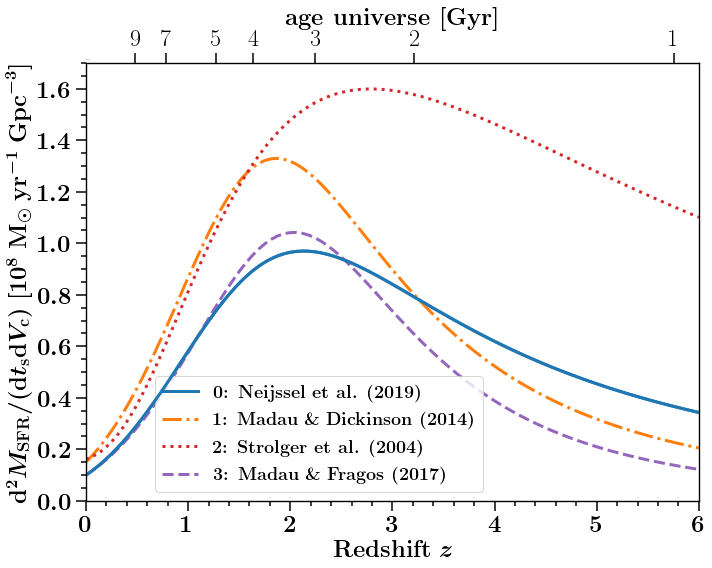

In [5]:
metallicityGrid = np.logspace(-4, -1.5,100)
MSSFR = ClassMSSFR.MSSFR(metallicityGrid=metallicityGrid)

# fontsize
fs = 20

clist=['#1f77b4', '#ff7f0e', '#d62728', '#9467bd'] 
#Plotting the SFR prescriptions
redshifts = np.linspace(0,6,100)
#strolger works in age not redshift
ages      = MSSFR.cosmology.age(redshifts).value

fig, axes = plt.subplots(1,1, figsize=(10,8))
axes.plot(redshifts, MSSFR.SFR_Neijssel(redshifts), c=clist[0], lw=3., label=r'\textbf{0: Neijssel et al. (2019)}', linestyle='-')
axes.plot(redshifts, MSSFR.SFR_Madau(redshifts),    c=clist[1], lw=3., label=r'\textbf{1: Madau }$\&$ \textbf{Dickinson (2014)}', linestyle='-.')
axes.plot(redshifts, MSSFR.SFR_Strolger(ages),      c=clist[2], lw=3., label=r'\textbf{2: Strolger et al. (2004)}', linestyle=':')
axes.plot(redshifts, MSSFR.SFR_Madau2(redshifts),   c=clist[3], lw=3., label=r'\textbf{3: Madau }$\&$ \textbf{Fragos (2017)}', linestyle='--')


# axes and legend layout 
nameX = r'\textbf{Redshift} $z$'
nameY = r'$ {\rm{d}}^2M_{\rm{SFR}}/({\rm{d}}t_{{\rm{s}}}{\rm{d}}V_{\rm{c}}) \   [10^8\ {\rm{M}}_{\odot}\  {\rm{yr}}^{-1}\ {\rm{Gpc}}^{-3}]$'
axes.legend(loc=8, prop={'size':18}, bbox_to_anchor=(0.38, 0))
axes.yaxis.offsetText.set_fontsize(0.1)
axes.set_ylim(0, 1.7*10**8)
axes.set_xlabel(nameX, fontsize=fs+4)
axes.set_ylabel(nameY, fontsize=fs+4)
axes.tick_params(labelsize=fs+4)
axes.set_xlim(0,6)
layoutAxes(axes, nameX=nameX, nameY=nameY, fontsize=fs+4)


### second axis for age ###
axes2  = axes.twiny()
axes2.plot(redshifts, MSSFR.SFR_Neijssel(redshifts), c=clist[0], lw=3., label='Preferred model')
#find nearest redshift to age
agelabels = np.array([1,2,3,4,5,7, 9]) #Gyr
ageUniverse = MSSFR.cosmology.age(0)
redshiftTicks = np.zeros(len(agelabels))
for nr, age in enumerate(agelabels):
    distance = np.abs(ages-age)
    ind      = np.where(distance==np.min(distance))[0][0]
    redshiftTicks[nr] =  redshifts[ind]

axes2.set_xticks(redshiftTicks)
axes2.set_xticklabels(agelabels)
nameX2 = r'\textbf{age universe [Gyr]}'

axes2.set_xlabel(nameX2, fontsize=fs+4)
axes2.tick_params(labelsize=fs+4)
layoutAxes(axes2, nameX=nameX2, nameY=None, fontsize=fs+4, setMinor=False)
axes2.set_xlim(0,6)
##

# save and show 
plt.tight_layout()
plt.savefig('./SFRplot.png', dpi=600,bbox_inches='tight')
plt.savefig('./SFRplot.pdf',bbox_inches='tight')
plt.show()

# make Figure B1b

warning no normalisation of mass evolved assuming 1


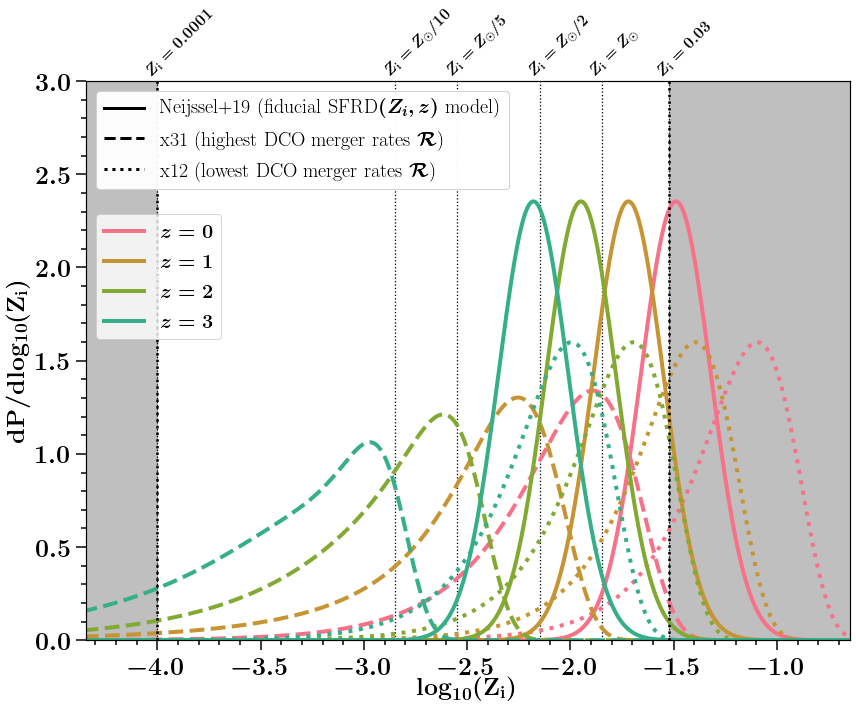

In [14]:
metallicityGrid = np.logspace(-4, -1.5,100)
mssfr = ClassMSSFR.MSSFR(metallicityGrid=metallicityGrid)

#.            FIDUCIAL                    HIGHEST.                        LOWEST 
method     = ['logNormal'                ,'MZ_GSMF'                     ,'MZ_GSMF'] #                      , 'MZ_GSMF'                    , 'MZ_GSMF'  ]
SFRs       = ['Neijssel et al. (2019)'   ,'Madau et al. (2014)'         ,'Madau et al. (2014)']#          , 'Madau et al. (2014)'        , 'Madau et al. (2014)']
logNormal  = ['Neijssel Phenomenological', None                         , None                  ]#        , None                         , None]
GSMFs      = [None                       ,'Furlong et al. (2015) Double', 'Panter et al. (2004) Single']#, 'Panter et al. (2004) Single', 'Furlong et al. (2015) Single']
MZs        = [None                       , 'Langer et al. (2006)'       , 'Langer et al. +offset (2006)'        ]#, 'Ma et al. (2015)'           , 'Ma et al. (2015)']

linestyles = ['-'                        , '--'                         , ':'                           ]#, '-.'                         , '-.']
labels     = ['Neijssel+19 (fiducial SFRD$(Z_i,z)$ model)'                 , r'x31 (highest DCO merger rates $\mathcal{R}$)'              , 'x12 (lowest DCO merger rates $\mathcal{R}$)']#, 'Ma et al. (2015)'           , 'Ma 2']


cm       = plt.get_cmap('viridis')
nColors  = 8+1  #want three colours for three variations (1 used in other plot later)
                    # dont want the brigthest colour hence I add a dummy value.
                    #Should be consistent with figure of metallicity PDFs
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

colours  =  [ 'b'                        ,mycolors[0]                   , mycolors[1]       \
             , mycolors[2], mycolors[3]]

solar=0.0142

redshifts = [0, 1, 2, 3, 4, 5, 6, 7]
zcolors       = sns.color_palette("husl", len(redshifts))
redshifts         = [0, 2, 4]
labelsZ = [r'$z=0 $',r'$z=1$', r'$z=2$']
alphas = [1.0, 0.6, 0.3]
redshifts=[0,1,2,3]
zcolors       = sns.color_palette("husl", 7)

fig, axes = plt.subplots(1,1, figsize=(12,10))
zBins = np.logspace(-8,2.,1000)
center = (zBins[1:] + zBins[:-1])/2.
width  = np.diff(np.log10(zBins))

handles1 = []
for nrz, redshift in enumerate(redshifts):
    for nrL, L in enumerate(labels[0:]):
        PDF = np.zeros(len(center))
        mssfr.Zprescription         = method[nrL]
        mssfr.SFRprescription       = SFRs[nrL]
        mssfr.logNormalPrescription = logNormal[nrL]
        mssfr.GSMFprescription      = GSMFs[nrL]
        mssfr.ZMprescription        = MZs[nrL]
        #code is done such that we have to do it per metallicity
        for nrZ, Z in enumerate(center):
            Zlower   = zBins[nrZ]
            Zupper   = zBins[nrZ+1]
            if method[nrL] == 'logNormal':
                PDF[nrZ] = mssfr.returnFractionLogNormal(Zlower, Zupper, redshift)
            if method[nrL] == 'MZ_GSMF':
                PDF[nrZ] = mssfr.returnFractionMZ_GSMF(Zlower, Zupper, [redshift])
        PDF = np.divide(PDF, width)
        if nrL==0:
            label = r'$z=%s$'%redshift #labelsZ[nrz]  #+'  '+'  z='+str(redshift[0])
            ll    = True
        else:
            label = None
            ll    = False
        if ll:
            l = axes.plot(np.log10(center), PDF,  color=zcolors[redshift], \
                  label=label, lw=4, alpha=1, linestyle=linestyles[nrL], zorder=2)
            handles1.extend(l)
        else:
            axes.plot(np.log10(center), PDF,  color=zcolors[redshift], \
                  label=label, lw=4, alpha=1, linestyle=linestyles[nrL], zorder=2)

first_legend = axes.legend(handles=handles1, loc=3,  prop={'size':20}, ncol=1, bbox_to_anchor=(0., .52))   
axes.add_artist(first_legend) 
      
    
top_y=3    

nameX = r'$\rm \log_{10}(Z_{\rm{i}})$'
nameY = r'$\rm dP / dlog_{10}(Z_{\rm{i}}) $'
# nameY = r'${\rm{d}}M_{\rm{SFR}} / \rm{d}\log_{10}(Z/Z_{\odot}) $'
for Z in [0.0001, 0.03]:
    N=10
    if Z==metallicityGrid[0]:
        x=np.linspace(np.log10(min(zBins)), np.log10(Z), N)
    else:
        x=np.linspace(np.log10(Z), np.log10(max(zBins)), N)
    y_low = np.zeros(N)
    y_high = np.ones(N)*(top_y+1)
    
    axes.fill_between(x=x,y1=y_low, y2=y_high, alpha=0.5, zorder=0, color='gray' )
    axes.axvline(np.log10(Z), c='k', linestyle=':', lw=2.5)

    
#again a fudge for second legend
handles2 = []

for nrL, label in enumerate(labels):
    #draw a line outside plot area
    line, = axes.plot([1, 2],[-1, -2], c='k', alpha=1, lw=3., label=labels[nrL], linestyle=linestyles[nrL])
    handles2.extend([line])

second_legend = axes.legend(handles=handles2, loc=2,  prop={'size':20}, ncol=1)   
axes.add_artist(second_legend)    


# plot Z values for some fixed metallicities
text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$', \
             r'$Z_{\rm{i}}=Z_{\odot}/5$',  r'$Z_{\rm{i}}=Z_{\odot}/10$',\
             r'$Z_{\rm{i}}=0.0001$', r'$Z_{\rm{i}}=0.03$' , r'$Z_{\rm{i}}=0.002$']    
for zz_ind, zz in enumerate([np.log10(solar), \
                             np.log10(0.5*solar),np.log10(0.2*solar), np.log10(0.1*solar), np.log10(0.0001),\
                             np.log10(0.03)]): #, np.log10(0.002)]) :
    axes.plot([zz,zz], [0,top_y+1], \
                     c='k',\
                     lw=1.3, alpha=1, linestyle=':', zorder=1)   
    axes.text(zz-0.06, top_y+0.01, s=text_list[zz_ind], fontsize=fs-4.5, verticalalignment='bottom', rotation=45)   






axes = layoutAxes(axes, nameX=nameX, nameY=nameY)
axes.set_ylim(bottom=0, top=top_y)
axes.set_xlim(np.log10((10**(-2.5))*solar), np.log10((10**(1.2))*solar))
plt.tight_layout()
plt.savefig('./ZvsPDF.png', dpi=600, bbox_inches='tight')
plt.savefig('./ZvsPDF.pdf',bbox_inches='tight')
plt.show()
plt.close()

# make Figure B1c

# make Figure B1d